## Python Libraries 

In [ ]:
import numpy as np
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
import pickle
import os
import tensorflow as tf
import keras as k
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Input, load_model
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
!pip install git+https://www.github.com/keras-team/keras-contrib.git
from keras_contrib.layers import CRF
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
!pip install seqeval
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
from tkinter import *
from tkinter.ttk import *
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-czdyblq6
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-czdyblq6
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=abc02d2fafeee73cd5c3e07e07f1d2f124d26c0d04b68440194fe4b6402aac95
  Stored in directory: /tmp/pip-ephem-wheel-cache-uxwu31co/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=8a317d5b805f57948384591a3a5a19e7be4831a4c5481cbb1028b73f85621ce5
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval


## Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Corpus

In [ ]:
nltk.download('cess_esp')
from nltk.corpus import cess_esp

tagged_sentences = cess_esp.tagged_sents()

print("\n", tagged_sentences[0], "\n")
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(cess_esp.tagged_words()))

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.

 [('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')] 

Tagged sentences:  6030
Tagged words: 192

## Sample of the arrays

In [ ]:
# Split sentences and tags into two different arrays
sentences, tagss = [], []
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    tagss.append(np.array(tags))
    sentences.append(np.array(sentence))

# Custom function for print a sentence
def goodPrint(a):
    x = ""
    for i in range(len(a)):
        x += a[i]+" "
    return x

print(str(len(sentences)) + " sentences\n")
print(str(len(sentences[0])) + " words in the first sentence\n")
print(goodPrint(sentences[0])+ "\n")
print(str(len(tagss[0])) +" tags in the first sentence\n" )
print(tagss[0])

6030 sentences

40 words in the first sentence

El grupo estatal Electricité_de_France -Fpa- EDF -Fpt- anunció hoy , jueves , la compra del 51_por_ciento de la empresa mexicana Electricidad_Águila_de_Altamira -Fpa- EAA -Fpt- , creada por el japonés Mitsubishi_Corporation para poner_en_marcha una central de gas de 495 megavatios . 

40 tags in the first sentence

['da0ms0' 'ncms000' 'aq0cs0' 'np00000' 'Fpa' 'np00000' 'Fpt' 'vmis3s0'
 'rg' 'Fc' 'W' 'Fc' 'da0fs0' 'ncfs000' 'spcms' 'Zp' 'sps00' 'da0fs0'
 'ncfs000' 'aq0fs0' 'np00000' 'Fpa' 'np00000' 'Fpt' 'Fc' 'aq0fsp' 'sps00'
 'da0ms0' 'aq0ms0' 'np00000' 'sps00' 'vmn0000' 'di0fs0' 'ncfs000' 'sps00'
 'ncms000' 'sps00' 'Z' 'ncmp000' 'Fp']


## Percentages for training, testing and evaluating

In [ ]:
(training_sentences, 
 test_sentences, 
 training_tags, 
 test_tags) = train_test_split(sentences, tagss, test_size=0.2)

(train_sentences, 
 eval_sentences, 
 train_tags, 
 eval_tags) = train_test_split(training_sentences, training_tags, test_size=0.25)


print("\n")
print(str(len(train_sentences)), " sentences for training (60%)")
print(str(len(test_sentences)), " sentences for testing (20%)")
print(str(len(eval_sentences)), " sentences for evaluating (20%)\n")

print("first sentence for training (",len(train_sentences[0]) , " words )\n", train_sentences[0])
print("\nfirst sentence for testing (",len(test_sentences[0]) , " words )\n", test_sentences[0])
print("\nfirst sentence for evaluating (",len(eval_sentences[0]) , " words )\n", eval_sentences[0])

print("\n---------------------------------------------------------------------------\n")

print(str(len(train_tags)), " tags for training (60%)")
print(str(len(test_tags)), " tags for testing (20%)")
print(str(len(eval_tags)), " tags for evaluating (20%)\n")

print("first tag for training  (",len(train_tags[0]) , " tags )\n", train_tags[0])
print("\nfirst tag for testing (",len(test_tags[0]) , " tags )\n", test_tags[0])
print("\nfirst tag for evaluating (",len(eval_tags[0]) , " tags )\n", eval_tags[0])



3618  sentences for training (60%)
1206  sentences for testing (20%)
1206  sentences for evaluating (20%)

first sentence for training ( 25  words )
 ['En' '1926' 'las' 'fábricas' 'de' 'Daimler' 'y' 'de' 'Benz' ',' 'que'
 'nunca' 'se' 'conocieron' 'personalmente' ',' 'se' 'reúnen' 'en' 'una'
 'sola' ',' 'la' 'DaimlerBenz_A._G.' '.']

first sentence for testing ( 44  words )
 ['Fuentes' 'del' 'sector' 'crítico' 'de' 'CDC' ',' 'opinan' 'que' 'el' '"'
 'golpe' 'de' 'efecto' '"' 'de' 'Esteve' 'ha' 'sorprendido'
 'favorablemente' ',' 'ya_que' '*0*' 'reconduce' 'la' 'situación'
 'interna' 'hacia' 'un' 'nuevo' 'escenario' 'en' 'el' 'que' 'se' 'pueden'
 'conciliar' 'mejor' 'las' 'distintas' 'sensibilidades' 'del' 'partido'
 '.']

first sentence for evaluating ( 20  words )
 ['De' 'toda' 'la' 'serie' 'sacó' 'Ford' 'la' 'experiencia' 'de' 'su'
 'vida' ':' 'la' 'gente' 'prefería' 'autos' 'sólidos' 'y' 'baratos' '.']

---------------------------------------------------------------------------

3

## Word and tag dictionaries

In [ ]:
words, tagsss = set([]), set([])
 
for s in (train_sentences + eval_sentences + test_sentences):
    for w in s:
        words.add(w.lower())

for ts in (train_tags + eval_tags + test_tags):
    for t in ts:
        tagsss.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 2 for i, t in enumerate(list(tagsss))}
tag2index['-PAD-'] = 0  # The special value used to padding
tag2index['-OOV-'] = 1  # The special value used to OOVs

print ("\nWord dictionary length: ", len(word2index))
print ("Tag dictionary length: ", len(tag2index))


Word dictionary length:  24499
Tag dictionary length:  291


## Parsing Dictionary

In [ ]:
train_sentences_X, eval_sentences_X, test_sentences_X, train_tags_y, eval_tags_y, test_tags_y = [], [], [], [], [], []

for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in eval_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    eval_sentences_X.append(s_int)

for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in train_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    train_tags_y.append(s_int)

for s in eval_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    eval_tags_y.append(s_int)

for s in test_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    test_tags_y.append(s_int)


print("\n--------------------------------------------------------------------------------------------------------------------------")
print("\nfirst parsed sentence for training (", len(train_sentences_X[0])," words )\n\n", train_sentences_X[0])
print("\ntags of the first parsed sentence for training (", len(train_tags_y[0])," tags )\n\n", train_tags_y[0])
print("\n--------------------------------------------------------------------------------------------------------------------------")
print("\nfirst parsed sentence for testing (", len(test_sentences_X[0])," words )\n\n", test_sentences_X[0])
print("\ntags of the first parsed sentence for testing (", len(test_tags_y[0])," tags )\n\n", test_tags_y[0])
print("\n--------------------------------------------------------------------------------------------------------------------------")
print("\nfirst parsed sentence for evaluating (", len(eval_sentences_X[0])," words )\n\n", eval_sentences_X[0])
print("\ntags of the first parsed sentence for evaluating (", len(eval_tags_y[0])," tags )\n\n", eval_tags_y[0])


--------------------------------------------------------------------------------------------------------------------------

first parsed sentence for training ( 25  words )

 [23539, 23356, 10898, 12409, 9799, 15248, 18910, 9799, 9990, 8366, 6782, 14330, 16359, 21989, 15199, 8366, 16359, 13980, 23539, 20273, 719, 8366, 18496, 19655, 22591]

tags of the first parsed sentence for training ( 25  tags )

 [240, 239, 25, 229, 240, 232, 100, 240, 232, 178, 81, 185, 20, 289, 185, 178, 90, 92, 240, 64, 22, 178, 70, 45, 44]

--------------------------------------------------------------------------------------------------------------------------

first parsed sentence for testing ( 44  words )

 [12346, 4109, 5735, 16617, 9799, 5167, 8366, 1666, 6782, 4757, 1114, 515, 9799, 14063, 1114, 9799, 8134, 11401, 5361, 8560, 8366, 15569, 18548, 6163, 18496, 15897, 12064, 12239, 22658, 13043, 9878, 23539, 4757, 6782, 16359, 570, 8955, 10152, 10898, 19514, 11478, 4109, 13758, 22591]

tags of the first p

## Normalization based on the longest sentence

In [ ]:
MAX_LENGTH_TRAIN = len(max(train_sentences_X, key=len))
MAX_LENGTH_EVAL = len(max(eval_sentences_X, key=len))
MAX_LENGTH_TEST = len(max(test_sentences_X, key=len))

print("\nLongest sentence in training set -> ", MAX_LENGTH_TRAIN, " words")
print("Longest sentence in evaluating set -> ", MAX_LENGTH_EVAL, " words")
print("Longest sentence in testing set -> ", MAX_LENGTH_TEST, " words")

MAX_LENGTH = max(MAX_LENGTH_TRAIN, MAX_LENGTH_EVAL, MAX_LENGTH_TEST)
print("\nLongest sentence in all sets -> ", MAX_LENGTH, " words\n")
print("-------------------------------------------------------------------------\n")

train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
eval_sentences_X = pad_sequences(eval_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')

train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
eval_tags_y = pad_sequences(eval_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')

print("first parsed and normalized sentence for training\n\n", train_sentences_X[0])
print("\ntags\n\n", train_tags_y[0])
print("\n-------------------------------------------------------------------------\n")
print("first parsed and normalized sentence for evaluating\n\n", eval_sentences_X[0])
print("\ntags\n\n", eval_tags_y[0])
print("\n-------------------------------------------------------------------------\n")
print("first parsed and normalized sentence for testing\n\n", test_sentences_X[0])
print("\ntags\n\n", test_tags_y[0])


Longest sentence in training set ->  134  words
Longest sentence in evaluating set ->  149  words
Longest sentence in testing set ->  95  words

Longest sentence in all sets ->  149  words

-------------------------------------------------------------------------

first parsed and normalized sentence for training

 [23539 23356 10898 12409  9799 15248 18910  9799  9990  8366  6782 14330
 16359 21989 15199  8366 16359 13980 23539 20273   719  8366 18496 19655
 22591     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0 

## Tags to One-hot vectors

In [ ]:
def to_categoricals(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

cat_train_tags_y = to_categoricals(train_tags_y, len(tag2index))
cat_eval_tags_y  = to_categoricals(eval_tags_y, len(tag2index))
cat_test_tags_y  = to_categoricals(test_tags_y, len(tag2index))

print("\nparsed and normalized tags for the first sentence\n\n", train_tags_y[0], "\n")
print("one-hot vectors matrix for the first sentence tags\n\n", cat_train_tags_y[0], "\n")
print("one-hot vector for the first sentence tag\n\n", cat_train_tags_y[0][0], "\n")


parsed and normalized tags for the first sentence

 [240 239  25 229 240 232 100 240 232 178  81 185  20 289 185 178  90  92
 240  64  22 178  70  45  44   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0] 

one-hot vectors matrix for the first sentence tags

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]] 

one-hot vector for the first sentence tag

 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0

# <font color='green'>Training</font> 

In [ ]:
## Funcion que permite forzar el uso de GPU cuando estan presentes
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
strategy = tf.distribute.MirroredStrategy()

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [ ]:
input = Input(shape=(MAX_LENGTH,))
word_embedding_size = 300

# Embedding Layer
model = Embedding(input_dim=len(word2index), output_dim=word_embedding_size, input_length=MAX_LENGTH)(input)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=word_embedding_size, 
                           return_sequences=True, 
                           dropout=0.5, 
                           recurrent_dropout=0.5, 
                           kernel_initializer=k.initializers.he_normal()))(model)

model = LSTM(units=word_embedding_size * 2, 
             return_sequences=True, 
             dropout=0.5, 
             recurrent_dropout=0.5, 
             kernel_initializer=k.initializers.he_normal())(model)

# TimeDistributed Layer
model = TimeDistributed(Dense(len(tag2index), activation="relu"))(model)  

# CRF Layer
crf = CRF(len(tag2index))

out = crf(model)  # output
model = Model(input, out)


#Optimiser 
adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])
print("\n")
model.summary()
print("\n")



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 149)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 149, 300)          7349700   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 149, 600)          1442400   
_________________________________________________________________
lstm_2 (LSTM)                (None, 149, 600)          2882400   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 149, 291)          174891    
_________________________________________________________________
crf_1 (CRF)                  (None, 149, 291)          170235    
Total params: 12,019,626
Trainable params: 12,019,626
Non-trainable params: 0
_____________________________________________

### <font color='orange'>[!] If using low-end GPU, COMMENT this block</font>

In [ ]:
model_hist = model.fit(train_sentences_X, cat_train_tags_y,
                       validation_data=(eval_sentences_X, cat_eval_tags_y),
                       batch_size=64, 
                       epochs=25,
                       validation_split=0.1,
                       verbose=1)


# serialize model to JSON
model_json = model.to_json()
with open("mb-full.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("mb-full.h5")
print("Model saved to disk")

Train on 3618 samples, validate on 1206 samples
Epoch 1/25
3618/3618 [==============================] - 71s 19ms/step - loss: 1.4285 - crf_viterbi_accuracy: 0.7854 - accuracy: 0.7850 - val_loss: 0.8534 - val_crf_viterbi_accuracy: 0.8140 - val_accuracy: 0.8141
Epoch 2/25
3618/3618 [==============================] - 66s 18ms/step - loss: 0.8286 - crf_viterbi_accuracy: 0.8156 - accuracy: 0.7850 - val_loss: 0.8094 - val_crf_viterbi_accuracy: 0.8171 - val_accuracy: 0.8172
Epoch 3/25
3618/3618 [==============================] - 66s 18ms/step - loss: 0.8017 - crf_viterbi_accuracy: 0.8178 - accuracy: 0.7850 - val_loss: 0.7924 - val_crf_viterbi_accuracy: 0.8188 - val_accuracy: 0.8189
Epoch 4/25
3618/3618 [==============================] - 66s 18ms/step - loss: 0.7835 - crf_viterbi_accuracy: 0.8196 - accuracy: 0.7850 - val_loss: 0.7677 - val_crf_viterbi_accuracy: 0.8236 - val_accuracy: 0.8237
Epoch 5/25
3618/3618 [==============================] - 65s 18ms/step - loss: 0.7370 - crf_viterbi_accur

### <font color='orange'>[!]  If using low-end GPU, UNCOMMENT this block</font>

In [ ]:
# model.load_weights("mb-full.h5")

# <font color='green'>Evaluating</font> 

In [ ]:
scores = model.evaluate(test_sentences_X, cat_test_tags_y)
print(scores[1] * 100)   # acc: 97.66269326210022

1206/1206 [==============================] - 8s 7ms/step
97.698575258255


In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
X_te = test_sentences_X[:201*128]
test_pred = model.predict(np.array(X_te), verbose=1)
#4768/4768 [==============================] - 64s 13ms/step
idx2tag = {i: w for w, i in tag2index.items()}
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PADword", "O"))
        out.append(out_i)
    return out
def test2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p].replace("PADword", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = test2label(test_tags_y[:201*128])
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))
print(classification_report(test_labels, pred_labels))
#print(X_te[0])

1206/1206 [==============================] - 5s 4ms/step
F1-score: 89.2%
           precision    recall  f1-score   support

    sps00       0.99      0.99      0.99      4995
       Fc       1.00      1.00      1.00      2225
       cc       0.98      1.00      0.99      1146
  vmip3s0       0.97      0.88      0.93       624
  vmg0000       0.16      0.58      0.25       105
  ncfp000       0.96      0.83      0.89       742
   da0ms0       1.00      1.00      1.00      1203
    spcms       1.00      0.99      0.99       684
   aq0cp0       0.91      0.75      0.82       247
 p0000000       0.71      0.49      0.58       184
       cs       0.93      0.90      0.91       878
  np00000       0.17      0.13      0.15        67
  ncmp000       0.92      0.87      0.89      1139
  ncms000       0.82      0.90      0.86      2259
       rg       0.97      0.89      0.93      1067
   aq0mpp       0.62      0.51      0.56        99
   ao0ms0       0.98      0.93      0.96        69
        

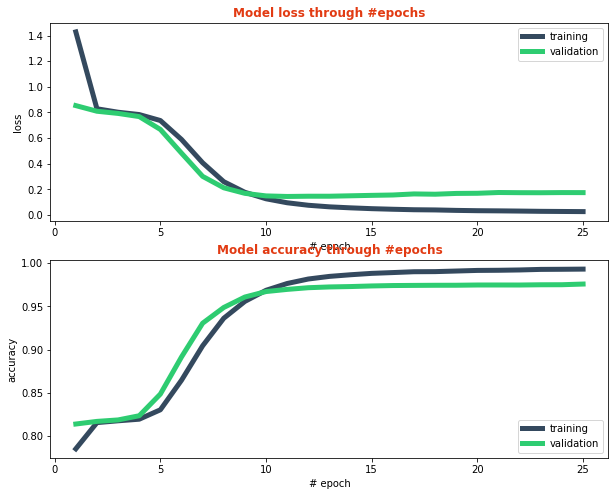

In [ ]:
def plot_model_performance(train_loss, train_acc, train_val_loss, train_val_acc):
    """ Plot model loss and accuracy through epochs. """
    blue= '#34495E'
    green = '#2ECC71'
    orange = '#E23B13'
    
    # plot model loss
    fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
    ax1.plot(range(1, len(train_loss) + 1), train_loss, blue, linewidth=5, label='training')
    ax1.plot(range(1, len(train_val_loss) + 1), train_val_loss, green, linewidth=5, label='validation')
    ax1.set_xlabel('# epoch')
    ax1.set_ylabel('loss')
    ax1.tick_params('y')
    ax1.legend(loc='upper right', shadow=False)
    ax1.set_title('Model loss through #epochs', color=orange, fontweight='bold')
    
    # plot model accuracy
    ax2.plot(range(1, len(train_acc) + 1), train_acc, blue, linewidth=5, label='training')
    ax2.plot(range(1, len(train_val_acc) + 1), train_val_acc, green, linewidth=5, label='validation')
    ax2.set_xlabel('# epoch')
    ax2.set_ylabel('accuracy')
    ax2.tick_params('y')
    ax2.legend(loc='lower right', shadow=False)
    ax2.set_title('Model accuracy through #epochs', color=orange, fontweight='bold')
    
plot_model_performance(
    train_loss=model_hist.history.get('loss', []),
    train_acc=model_hist.history.get('crf_viterbi_accuracy', []),
    train_val_loss=model_hist.history.get('val_loss', []),
    train_val_acc=model_hist.history.get('val_crf_viterbi_accuracy', [])
)

In [ ]:
# función que recibe en sequences la lista de oraciones donde cada elemento de la oracion es un one-hot vector
# permite convertir Indices en Tags
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

# Prediccion sobre el conjunto de pruebas. De la distribución probabilística a etiquetas
prediction = model.predict(test_sentences_X)
log_tokens = logits_to_tokens(prediction, {i: t for t, i in tag2index.items()})

print("\ntags predicted for evaluating:\n\n", log_tokens[0], "\n")


tags predicted for evaluating:

 ['ncfp000', 'spcms', 'ncms000', 'aq0ms0', 'sps00', 'np0000o', 'Fc', 'vmip3p0', 'cs', 'da0ms0', 'Fe', 'ncms000', 'sps00', 'ncms000', 'Fe', 'sps00', 'np0000p', 'vaip3s0', 'vmp00sm', 'np0000o', 'Fc', 'cs', 'sn.e-SUJ', 'vmsp3s0', 'da0fs0', 'ncfs000', 'aq0fs0', 'sps00', 'di0ms0', 'aq0ms0', 'ncms000', 'sps00', 'da0ms0', 'pr0cn000', 'p0000000', 'vmip3p0', 'vmn0000', 'rg', 'da0fp0', 'di0fp0', 'ncfp000', 'spcms', 'ncms000', 'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '

In [ ]:
results = pd.DataFrame(columns=['Expected', 'Predicted'])
k = 0
for i, lista_etiquetas_oracion in enumerate(test_tags):
    for j, etiquetas in enumerate(lista_etiquetas_oracion):
        k = k + 1
        results.loc[k, 'Expected'] = etiquetas
        results.loc[k, 'Predicted'] = log_tokens[i][j]

print("\nresults:\n\n", results)
print('\n\nclassification_report:\n\n', classification_report(results['Expected'], results['Predicted']))


results:

       Expected Predicted
1      ncfp000   ncfp000
2        spcms     spcms
3      ncms000   ncms000
4       aq0ms0    aq0ms0
5        sps00     sps00
...        ...       ...
37840  np0000l   np0000o
37841       Fc        Fc
37842    sps00     sps00
37843  np0000l   np0000l
37844       Fp        Fp

[37844 rows x 2 columns]


classification_report:

            precision    recall  f1-score   support

  dp3cs0O       1.00      1.00      1.00       266
      FsO       1.00      0.91      0.95        11
 ncms000O       0.82      0.90      0.86      2259
      csO       0.93      0.90      0.91       878
      rgO       0.97      0.89      0.93      1067
 vsn0000O       0.98      0.98      0.98        47
  da0ms0O       1.00      1.00      1.00      1203
      FcO       1.00      1.00      1.00      2225
  dd0fs0O       0.95      1.00      0.98        63
p0300000O       0.62      0.81      0.70       200
 vmn0000O       0.99      0.74      0.85       801
  aq0cs0O       0.95  

# <font color='green'>Testing</font> 

### <font color='orange'>[!]  If running online, COMMENT this block (Graphic Interface)</font>

In [ ]:
# def pos_tagging():
# #    sentence="Correr es importante para mi ."
# #    sentence="El hombre bajo corre bajo el puente con bajo índice de adrenalina"

#     test_samples = [inputText.get("1.0",END).split()]  
#     test_samples_X = []
#     for s in test_samples:
#         s_int = []
#         for w in s:
#             try:
#                 s_int.append(word2index[w.lower()])
#             except KeyError:
#                 s_int.append(word2index['-OOV-'])

#         test_samples_X.append(s_int)

#     test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
    
#     predictions = model.predict(test_samples_X)
#     tags = predictions.shape[2]

#     heads = test_samples[0]
#     body = [log_tokens[0][:len(test_samples[0])]]
    
#     index = 0  
#     output = PrettyTable(['      Word       ', '       Tag      '])
#     for w in heads:
#         output.add_row([w, body[0][index] ])       
#         index+=1  
   
#     #-------------------------------------
#     outputText.configure(state='normal')
#     outputText.delete('1.0', END)    
#     outputText.insert("insert", output) 
#     outputText.configure(state='disabled')
#     #-------------------------------------

#     return output

# window = Tk()
# window.title("Postagging")
# window.geometry('770x630')
# title = '\t\tPostagging\n BiLSTM + CRF with the cess_esp corpus from NLTK '

# label= Label( text = title, background="white", font = "Consolas 18 bold")
# label.grid(column=0, row=0, pady=(10, 10), columnspan=2)

# label= Label( text = "  Input  ", background="white", font = "Consolas 12 bold")
# label.grid(column=0, row=1, pady=(10, 10))

# btn = Button(window, text="  POS TAGGING >>  ",command=pos_tagging)
# btn.grid(column=0, row=1, pady=(10, 10), columnspan=2 )

# label= Label( text = "  Output  ", background="white", font = "Consolas 12 bold")
# label.grid(column=1, row=1, pady=(10, 10))

# inputText = Text(window,height=25, width=40, font = "Consolas 12")
# inputText.grid(column=0, row=3, padx=(10,10))

# outputText = Text(window,height=25, width=40, state='disabled', font = "Consolas 12")
# outputText.grid(column=1, row=3, padx=(10,10))
# outputText.tag_configure("center", justify='center')

# window.mainloop()

In [ ]:
test_samples = [
    "Correr es importante para mi .".split(),
    "El hombre bajo corre bajo el puente con bajo índice de adrenalina .".split()
]
print("\nTesting sentences:\n\n", test_samples[0], "\n", test_samples[1])

test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
    
    test_samples_X.append(s_int)

test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
sentences,words = test_samples_X.shape
print("\n----------------------------------------------------------------------------\n")
print("\nTesting sentences parsed to integer (matrix of ", sentences ," sentences X ", words ," words ):\n\n")
print(test_samples_X[0], "\n")
print(test_samples_X[1], "\n")


Testing sentences:

 ['Correr', 'es', 'importante', 'para', 'mi', '.'] 
 ['El', 'hombre', 'bajo', 'corre', 'bajo', 'el', 'puente', 'con', 'bajo', 'índice', 'de', 'adrenalina', '.']

----------------------------------------------------------------------------


Testing sentences parsed to integer (matrix of  2  sentences X  149  words ):


[16251 13938  5301 11186 17742 22591     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
 

In [ ]:
heads1 = test_samples[0]
body1 = [log_tokens[0][:len(test_samples[0])]]

heads2 = test_samples[1]
body2 = [log_tokens[1][:len(test_samples[1])]]

print("\nTest results:\n\n")
print(tabulate(body1, headers=heads1), "\n")
print(tabulate(body2, headers=heads2), "\n")

## postagging Freeling 4.1

## El      hombre   bajo     corre    bajo  el      puente   con  bajo  índice   de  adrenalina  .
## DA0MS0  NCMS000  AQ0MS00  VMIP3S0  SP    DA0MS0  NCMS000  SP   SP    NCMS000  SP  NCFS000     Fp


## pos tagger Stanford NLP

## El      hombre   bajo     corre    bajo  el      puente   con    bajo   índice  de    adrenalina  .
## da0000  nc0s000  aq0000   vmip000  sp000 da0000  nc0s000  sp000  aq0000 nc0s000 sp000 nc0s000     fp


Test results:


Correr    es     importante    para    mi     .
--------  -----  ------------  ------  -----  -------
ncfp000   spcms  ncms000       aq0ms0  sps00  np0000o 

El      hombre    bajo     corre    bajo    el       puente    con      bajo    índice    de      adrenalina    .
------  --------  -------  -------  ------  -------  --------  -------  ------  --------  ------  ------------  --------
dp3cs0  ncms000   vsip3s0  vmsp3s0  sps00   np0000o  cc        np0000o  Fc      da0fp0    dn0cp0  ncfp000       pr0cn000 

